# Anuncios de trabajo en Madrid (Web Scraping)

David Ravelli, Luca Roggio - UEM - curso 2024/25

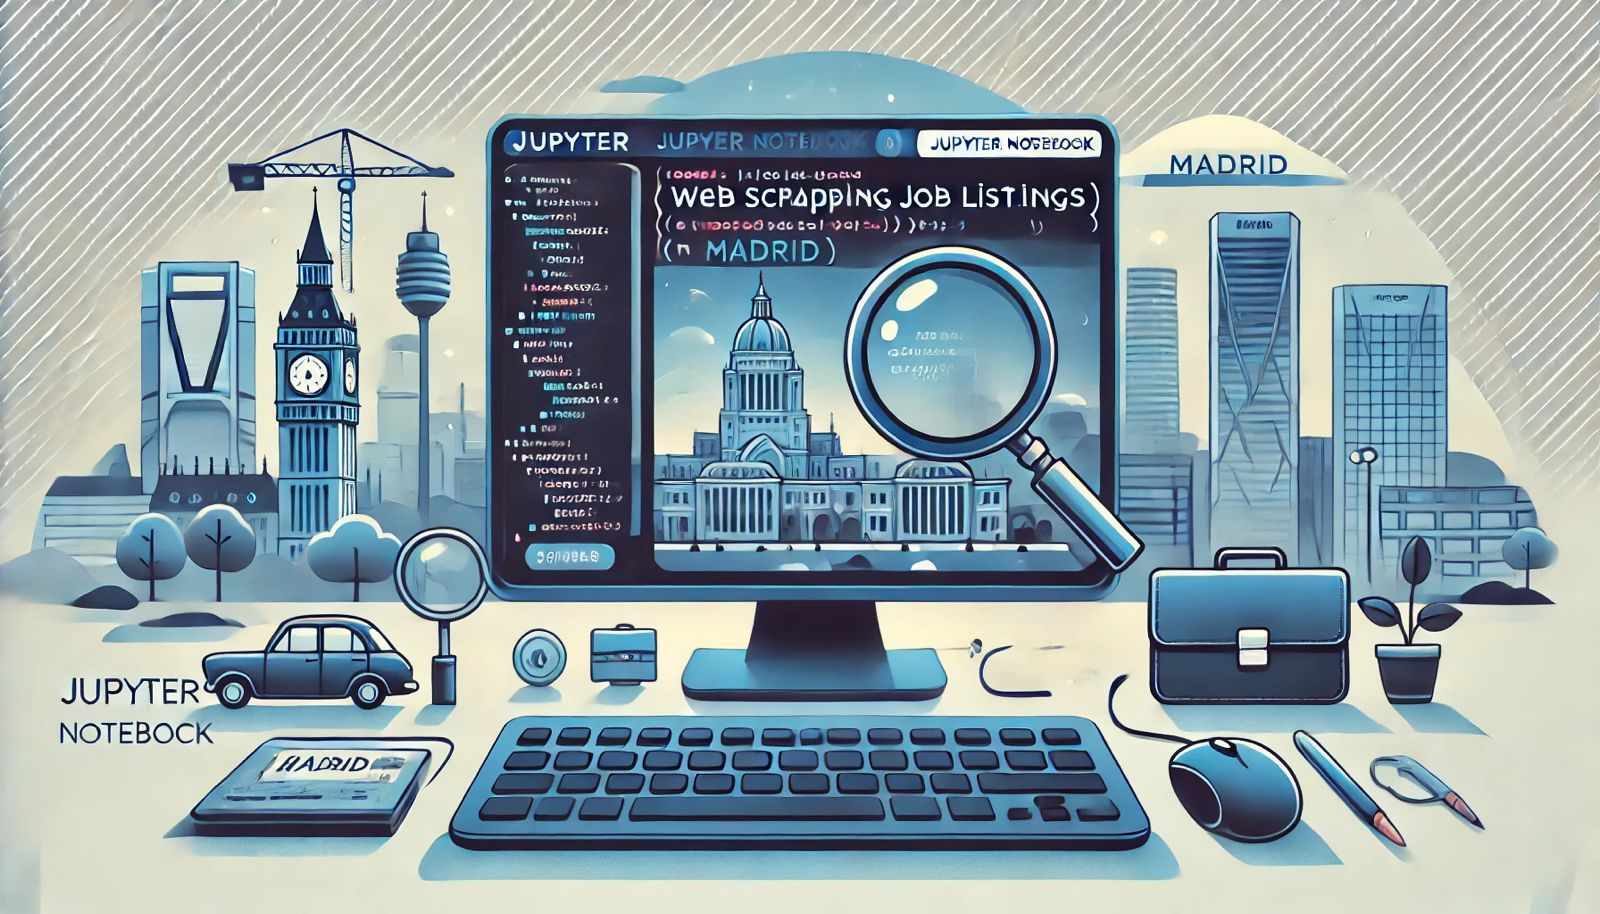

## Objetivos

El objetivo de este proyecto es realizar un proceso de Web Scraping para extraer información de ofertas de trabajo de la página web de Indeed en Madrid. Para ello, se utilizaron las librerías Selenium y BeautifulSoup para extraer datos relevantes como el título del anuncio, empresa, lugar de trabajo, salario, tipo de contrato, días laborales, jornada laboral y el enlace a cada oferta. Posteriormente, los datos extraídos se almacenan en un DataFrame utilizando Pandas para su análisis.


## Estado del Arte

El Web Scraping es una técnica popular para la extracción de datos de sitios web, especialmente útil para obtener información de páginas donde los datos no están fácilmente accesibles a través de una API. Herramientas como Selenium son útiles para interactuar con páginas web dinámicas, donde se requiere simular clics o desplazamiento, mientras que BeautifulSoup permite realizar el análisis y la extracción de datos del HTML resultante. Los datos recolectados generalmente se almacenan en bases de datos o en estructuras como DataFrames para su posterior análisis y visualización.

## Metodologia utilizada

1.	Extracción de Datos:
	1.	Se utilizó Selenium para cargar la página web de Indeed y navegar por las diferentes ofertas de trabajo.
	2.	Se empleó BeautifulSoup para parsear el HTML de la página y extraer la información relevante de cada anuncio de trabajo (título, empresa, lugar, salario, contrato, jornada, etc.).
	1.	Utilicé un diccionario de palabras clave para identificar las secciones que contienen el salario, los días de trabajo, el tipo de contrato y la jornada laboral.
2.	Almacenamiento de Datos:
	1.	Los datos extraídos fueron almacenados en varias listas correspondientes a cada categoría (título, empresa, lugar, etc.).
	2.	Después, se crearon un DataFrame de Pandas que agrupa todos los datos de manera estructurada, con columnas como Título, Sector, Lugar, Empresa, Salario, Contrato, Días de la Semana, Jornada y Link.
3.	Navegación por Sectores:
    1. Se configuró un ciclo que permite navegar automáticamente entre los sectores utilizando los filtros de búsqueda de Indeed, extrayendo los datos de cada sector seleccionado hasta que se completen todos los sectores definidos.
4.	Cuadro de Mando:
	1.	El DataFrame resultante se utilizó para crear un cuadro de mando con los resultados de las ofertas de trabajo, permitiendo hacer un análisis más detallado de la información extraída.

In [103]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd

In [105]:
# Configurar el driver
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

# Navega a la página de búsqueda de Indeed
driver.get("https://es.indeed.com/jobs?q=&l=Madrid%2C+Madrid+provincia&from=searchOnHP&vjk=0d6749ebe6a2c0cb")

Este código configura el driver de Selenium para usar Google Chrome. Primero, descarga e instala automáticamente la versión correcta del ChromeDriver con ChromeDriverManager. Luego, crea un objeto ChromeOptions para configurar el navegador y, finalmente, inicializa el driver que permite controlar Chrome con las opciones y el driver configurados.

In [108]:
# Extrae los datos
soup = BeautifulSoup(driver.page_source, 'html.parser')
print(soup.prettify())

<html class="js-focus-visible" data-js-focus-visible="" dir="ltr" lang="es">
 <head>
  <link href="/images/favicon.ico" rel="shortcut icon"/>
  <title>
   14.000 empleos en Madrid, Madrid provincia | Bolsa de Indeed.com
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="14.911 empleos disponibles en Madrid, Madrid provincia en Indeed.com. ¡Empleos de Cajero/a reponedor/a, Recepcionista, Installer y muchos más!" name="description"/>
  <meta content="origin-when-cross-origin" name="referrer"/>
  <link href="/jobs?q=&amp;l=Madrid%2C+Madrid+provincia&amp;from=searchOnHP&amp;jlid=dd616958bd9ddc12&amp;forceLocation=-1&amp;start=10" rel="next"/>
  <link href="https://es.indeed.com/l-madrid,-madrid-provincia-empleos.html" rel="canonical"/>
  <link href="android-app://com.indeed.android.jobsearch/https/es.indeed.com/m/jobs?q=&amp;l=Madrid%2C+Madrid+provincia&amp;from=searchOnHP&amp;vjk=0d6749ebe6a2c0cb" rel="alternate"/>
  <link href="ios-app://ht

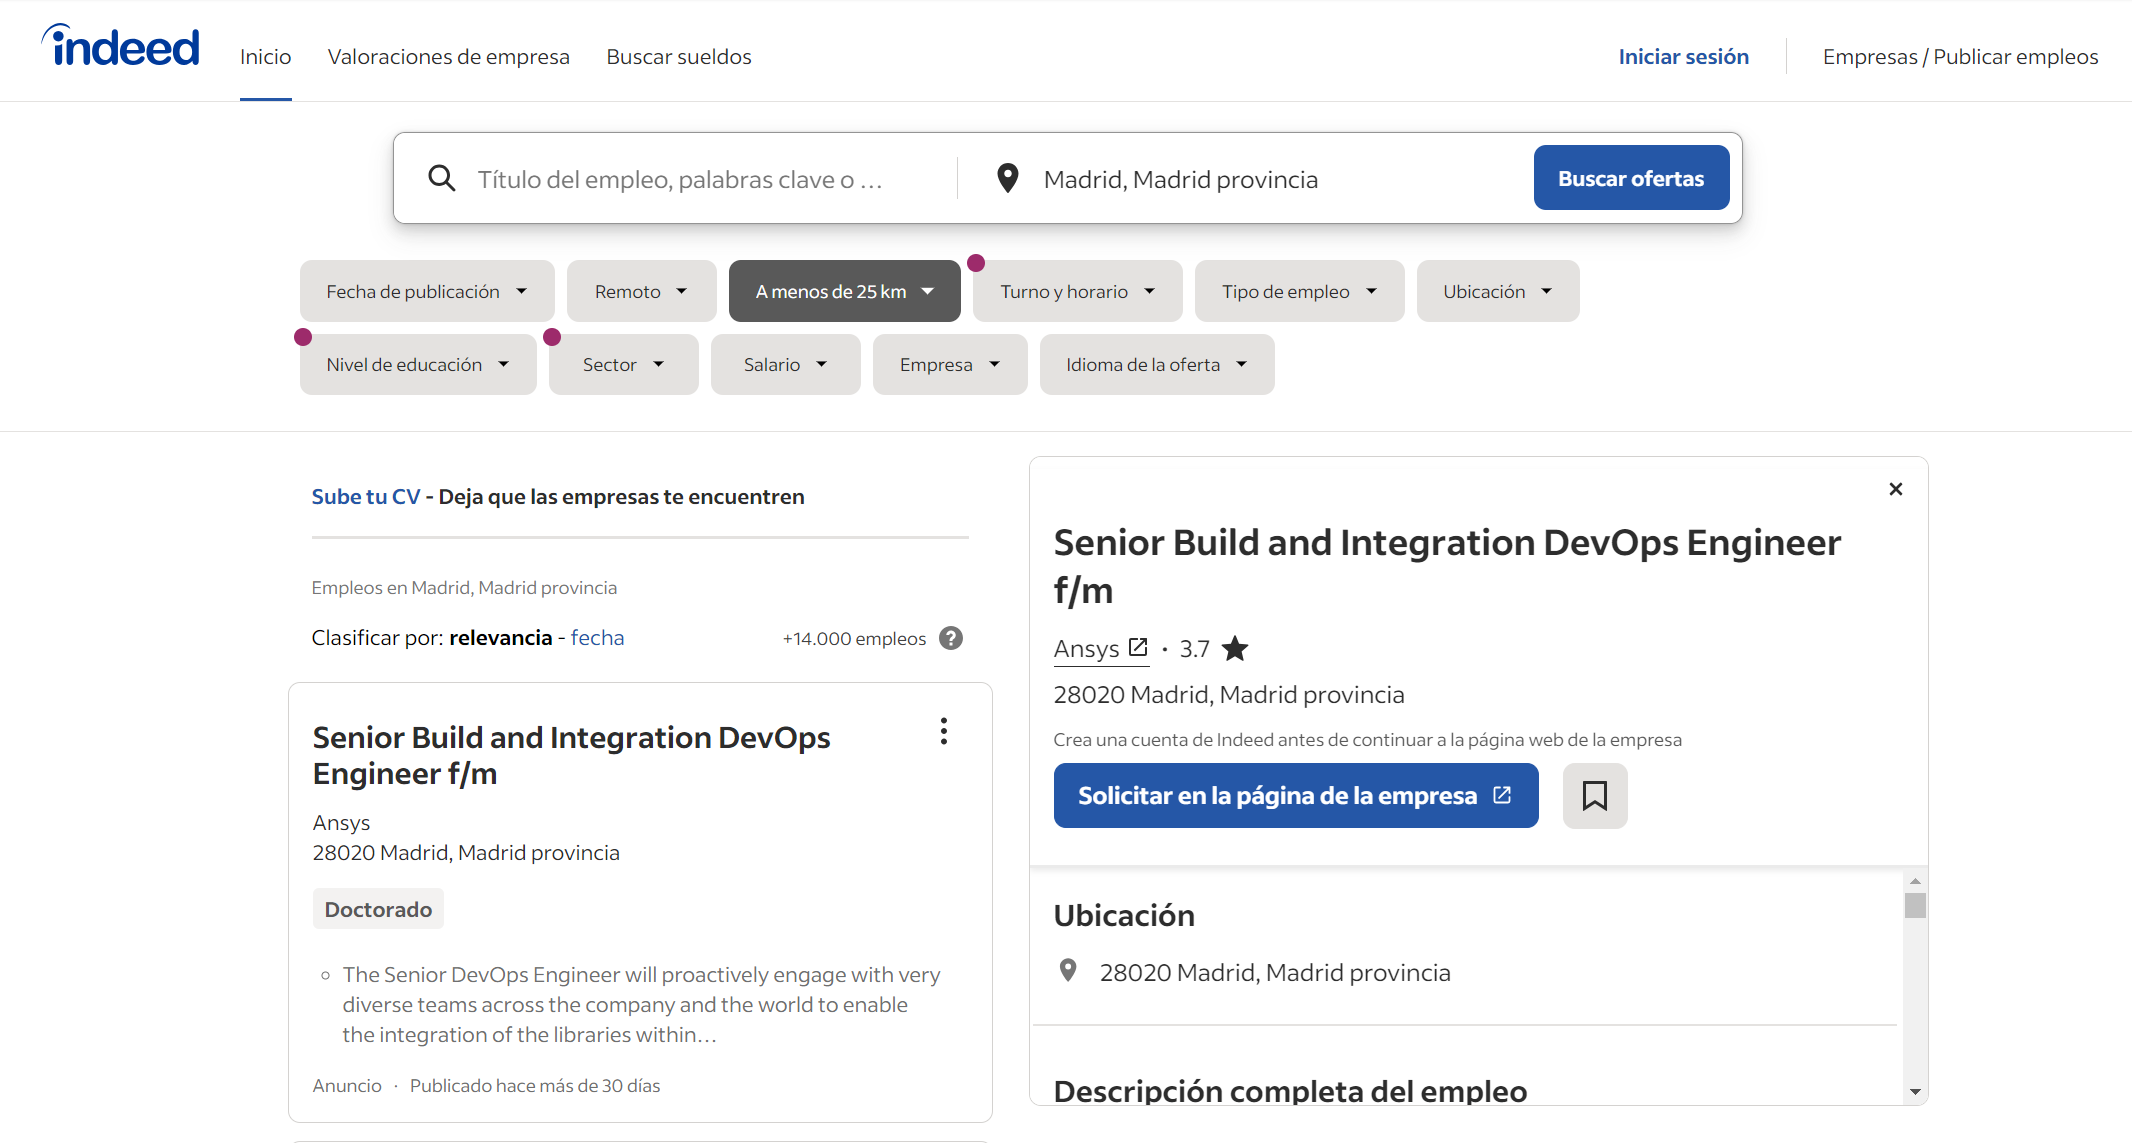

Captura de pantalla de la página inicial de Indeed que se abre al iniciar la búsqueda. Muestra varios anuncios de empleo, la barra de búsqueda en la parte superior y una sección de filtros para refinar los resultados de búsqueda.

In [110]:
anuncio_titulo = []
anuncio_sector = []
anuncio_empresa = []
anuncio_lugar = []
anuncio_salario = []
anuncio_dias_de_trabajo = []
anuncio_contrato = []
anuncio_jornada = []
anuncio_link = []

2.	Palabras clave para buscar información:
Se define un diccionario de palabras clave relacionadas con el salario, los días de trabajo, el contrato y la jornada, que ayudará a identificar los detalles correspondientes dentro de los anuncios.

In [ ]:
# parablas key 
keywords = {
    "salario": ["€"],
    "dias_de_trabajo": ["lunes", "viernes", "semana", "dias", "martes", "miercoles", "jueves", "domingo", "sabado"],
    "contrato": ["contrato", "temporal", "indefinido"],
    "jornada": ["turno", "jornada", "completa", "media jornada"],
}

3.	Por cada **anuncio**:
	1.	*Extraer anuncios*: Se obtiene una lista de todos los anuncios de trabajo de la página utilizando el método find_elements con un selector XPath.
	2.	*Recorrer cada anuncio*: Por cada anuncio encontrado:
	3.	Se extrae el *título* del anuncio y se agrega a la lista anuncio_titulo.
	4.	Se extrae la *empresa* y se agrega a la lista anuncio_empresa.
	5.	Se extrae el *lugar* y se agrega a la lista anuncio_lugar.
	6.	Se obtiene el *enlace* del anuncio y se agrega a la lista anuncio_link.
	7.	*Extraer información adicional*: Para cada anuncio, se buscan campos adicionales que contienen información de salario, días de trabajo, tipo de contrato y jornada. Si se encuentra alguna palabra clave que coincida con los criterios, se asigna el valor correspondiente.
	8.	*Manejo de errores*: Si algún elemento no se puede encontrar en el anuncio (por ejemplo, si no hay información sobre salario), se ignora sin interrumpir la ejecución del programa, gracias a la excepción NoSuchElementException.

In [118]:
anuncios = driver.find_elements(By.XPATH, '//div[contains(@class, "job_seen_beacon")]')

In [114]:
sectores = ["Tecnologías de la información", "Servicios de construcción, reparación y mantenimiento", "Ventas al mayoreo y al menudeo", "Recursos humanos", "Manufactura", "Educación", "Salud", "Energía, minería e infrastructura pública", "Administración y consultoría", "Aeroespacial y defensa", "Farmacéutica y biotecnología", "Restaurantes y servicios de comidas", "Audiovisual y medios de comunicación", "Finanzas", "Turismo y hospedaje", "Seguros", "Transporte y logística", "ONG y organizaciones sin ánimo de lucro", "Telecomunicaciones", "Bienes raíces", "Agricultura", "Gobierno y administración pública", "Legal", "Servicios personales al consumidor", "Artes y entretenimiento"]

### Explicación de las funciones:

1. **click_filter**: Hace clic en el botón para abrir el filtro de sectores. Espera hasta que el botón sea clickeable y luego lo presiona.

2. **click_sector**: Hace clic en el sector específico que se pasa como parámetro, buscando el texto del sector dentro de una etiqueta `span`.

3. **click_actualizar**: Hace clic en el botón "Actualizar" para aplicar los filtros de búsqueda. Espera hasta que el botón sea clickeable y lo presiona.

Estas funciones automatizan la interacción con la página web usando Selenium.


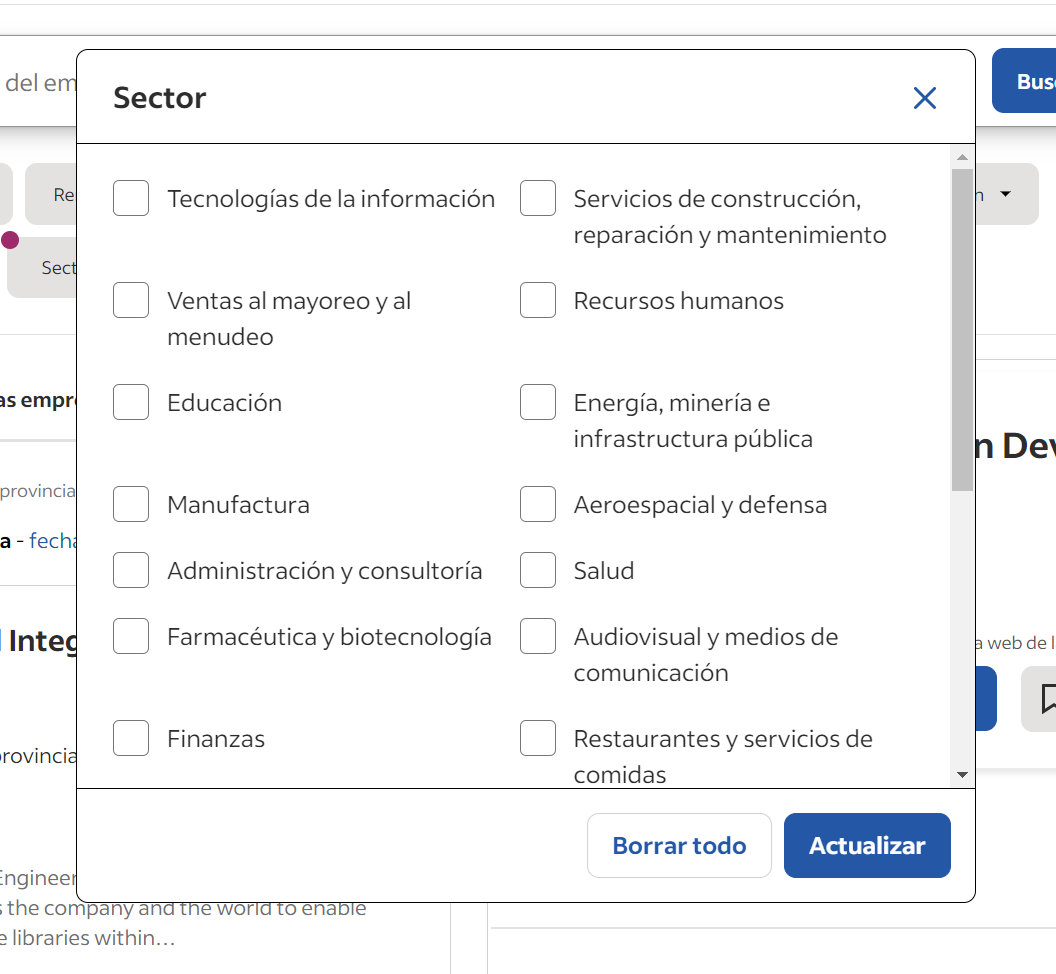


Sección de filtros en Indeed, con opciones de selección donde se pueden elegir diferentes sectores laborales para personalizar la búsqueda de empleo.

In [120]:
# click filter
def click_filter():
    sector_filter_button = driver.find_element(By.ID, "filter-taxo1")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable(sector_filter_button))
    sector_filter_button.click()

In [122]:
# click sectores
def click_sector(sector_name):
    sector_checkbox = driver.find_element(By.XPATH, f"//label/span[text()='{sector_name}']")
    sector_checkbox.click()

In [124]:
# click actualizar
def click_actualizar():
    actualizar_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//button[@type='submit'][span='Actualizar']")))
    actualizar_button.click()

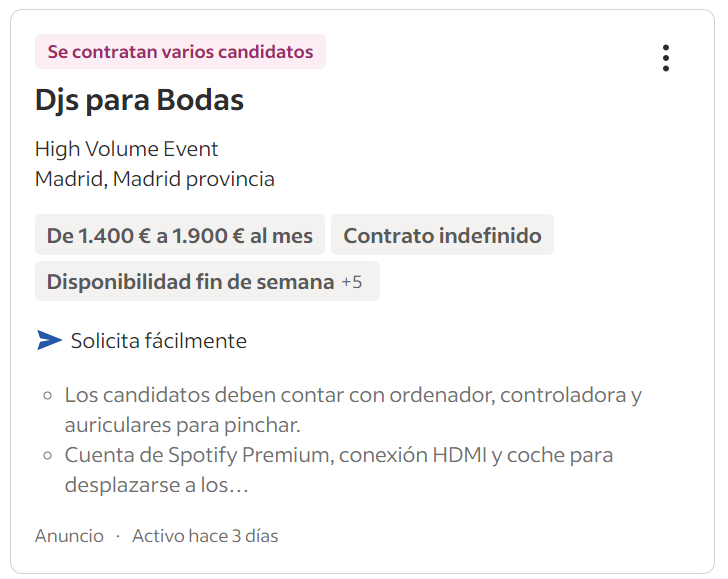

Captura de pantalla de un anuncio de trabajo en Indeed que incluye el título del puesto, el nombre de la empresa, la ubicación y varios detalles adicionales sobre el empleo.

In [126]:
import time

for sector in sectores:
    #carga pagina
    time.sleep(3)
    
    click_filter()
    time.sleep(1)

    click_sector(sector)
    
    click_actualizar()
    time.sleep(3)

    #lista anuncios
    anuncios = driver.find_elements(By.XPATH, '//div[contains(@class, "job_seen_beacon")]')

    # extrae los anuncios
    for anuncio in anuncios:
        try:
            #busca anuncios
            try:
                # titulo anuncio
                titulo = anuncio.find_element(By.XPATH, './/span[starts-with(@id, "jobTitle")]').text
                anuncio_titulo.append(titulo)

                #sector anuncio
                anuncio_sector.append(sector)
            
                # empresa anuncio
                empresa = anuncio.find_element(By.XPATH, './/span[@data-testid="company-name"]').text
                anuncio_empresa.append(empresa)

                # lugar anuncio
                lugar = anuncio.find_element(By.XPATH, './/div[@data-testid="text-location"]').text
                anuncio_lugar.append(lugar)

                # Link anuncio
                link = anuncio.find_element(By.XPATH, './/a[span[@title]]')
                url = link.get_attribute('href')
                anuncio_link.append(url) 

                # extrae attributes
                info = anuncio.find_elements(By.XPATH, './/div[@data-testid="attribute_snippet_testid"]')

                # valores NaN
                salario = "NaN"
                dias_de_trabajo = "NaN"
                contrato = "NaN"
                jornada = "NaN"

                # Busca con parablas key
                for item in info:
                    text = item.text
                    
                    if any(keyword in text for keyword in keywords["salario"]):
                        salario = text
                    elif any(keyword in text for keyword in keywords["dias_de_trabajo"]):
                        dias_de_trabajo = text
                    elif any(keyword in text for keyword in keywords["contrato"]):
                        contrato = text
                    elif any(keyword in text for keyword in keywords["jornada"]):
                        jornada = text

                # agrega numbres a la lista
                anuncio_salario.append(salario)
                anuncio_dias_de_trabajo.append(dias_de_trabajo)
                anuncio_contrato.append(contrato)
                anuncio_jornada.append(jornada)

            except StaleElementReferenceException:
                pass

        except NoSuchElementException:
            pass

    # restablecer el filtro
    click_filter()
    time.sleep(2)
    
    click_sector(sector)
    
    click_actualizar()
    time.sleep(5)


4.	Creación del DataFrame:
	
 Crea un DataFrame con los datos extraídos: Los datos de los anuncios (título, sector, lugar, empresa, salario, contrato, días de trabajo, jornada y enlace) se combinan en un DataFrame de pandas, lo que permite visualizar y manipular fácilmente los datos.

In [165]:
df = pd.DataFrame(zip(anuncio_titulo, anuncio_sector, anuncio_lugar, anuncio_empresa, anuncio_salario, anuncio_contrato, anuncio_dias_de_trabajo, anuncio_jornada, anuncio_link), columns = ['Titulo', 'Sector', 'Lugar', 'Empresa', 'Salario', 'Contrato', 'Dias de la Semana', 'Jornada', 'Link'])
df

,Titulo,Sector,Lugar,Empresa,Salario,Contrato,Dias de la Semana,Jornada,Link
0,Search Engine Evaluator for AI Models | Spanis...,Tecnologías de la información,"Teletrabajo in Madrid, Madrid provincia",RWS Group,NaN,NaN,NaN,NaN,https://es.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Transcripción,Tecnologías de la información,"Madrid, Madrid provincia",Aptent,NaN,NaN,NaN,NaN,https://es.indeed.com/rc/clk?jk=18ac3faf2310f4...
2,Audiodescripción,Tecnologías de la información,"Madrid, Madrid provincia",Aptent,NaN,NaN,NaN,NaN,https://es.indeed.com/rc/clk?jk=d14e9dc4f2cc63...
3,Subtitulado y traducción,Tecnologías de la información,"Madrid, Madrid provincia",Aptent,NaN,NaN,NaN,NaN,https://es.indeed.com/rc/clk?jk=5b9a40fc957073...
4,Personal de administración / Grabador/a de Datos,Tecnologías de la información,"Madrid, Madrid provincia",CERTIFICACIÓN ACCESIBILIDAD AIS,NaN,NaN,NaN,NaN,https://es.indeed.com/rc/clk?jk=b399b15dc68940...
...,...,...,...,...,...,...,...,...,...
370,RESTAURACION DE MUEBLES,Artes y entretenimiento,"Centro-Madrid, Madrid provincia",Educo,NaN,Contrato indefinido,NaN,NaN,https://es.indeed.com/rc/clk?jk=e38c2b56cda216...
371,ENERGY STORAGE - PROJECT DEVELOPMENT MANAGER (...,Artes y entretenimiento,"Trabajo híbrido in 28006 Madrid, Madrid provincia",REDEN,NaN,NaN,NaN,NaN,https://es.indeed.com/rc/clk?jk=a7364f276855c7...
372,PROFESOR/A DE PILATES,Artes y entretenimiento,"Madrid, Madrid provincia",Educo,NaN,Contrato indefinido,NaN,NaN,https://es.indeed.com/rc/clk?jk=f596707af5d1c6...
373,Acquisition Marketing Manager,Artes y entretenimiento,"Madrid, Madrid provincia",Betway Group,NaN,NaN,NaN,Jornada completa,https://es.indeed.com/rc/clk?jk=7531def2f1c532...


Guardar el DF en un archivo CSV:

In [167]:
df.to_csv('annunci_lavoro.csv', index=False, encoding='utf-8')

## Resultados Obtenidos

C:\Users\lucar\AppData\Local\Temp\ipykernel_15236\3483411146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')


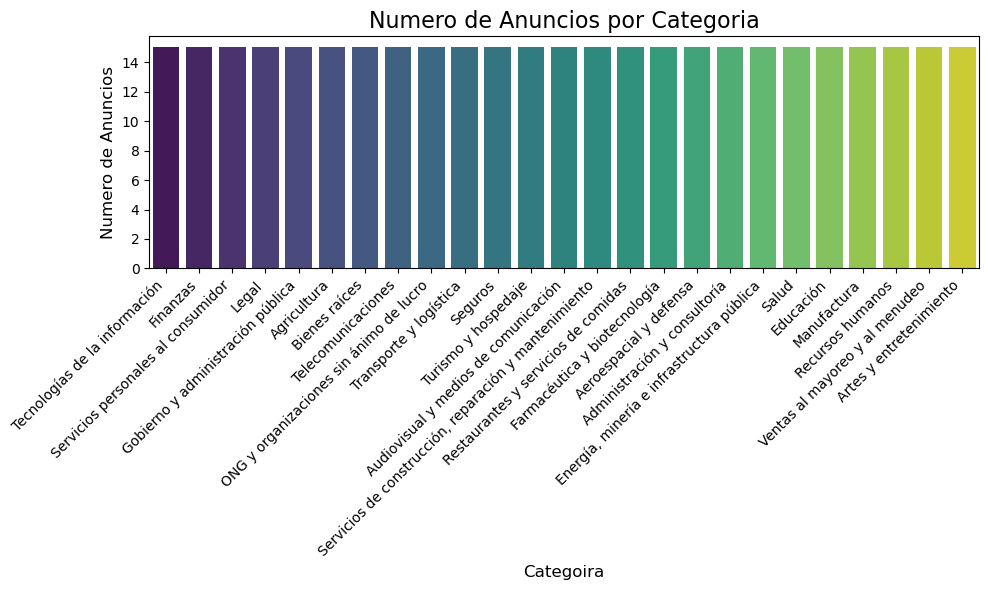

In [188]:
# Cuenta el número de anuncios por cada sector
sector_counts = df['Sector'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')

# Añade títulos y etiquetas
plt.title('Numero de Anuncios por Categoria', fontsize=16)
plt.xlabel('Categoira', fontsize=12)
plt.ylabel('Numero de Anuncios', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.tight_layout()  # Mejora la disposición del gráfico
plt.show()

El gráfico muestra que hay 15 anuncios por sector, ya que nuestra iteración se basa en una página de anuncios (15 por página) para cada sector.

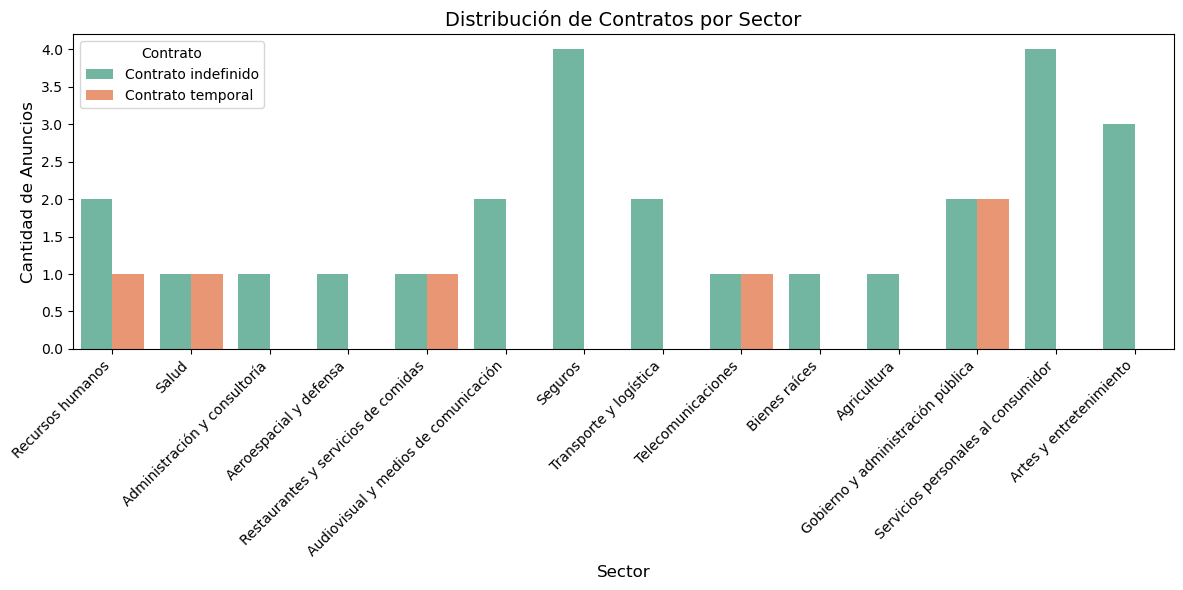

In [186]:
import numpy as np

df['Contrato'] = df['Contrato'].replace("NaN", np.nan)

df_clean = df.dropna(subset=['Contrato'])

plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='Sector', hue='Contrato', palette='Set2')

plt.title('Distribución de Contratos por Sector', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Cantidad de Anuncios', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Muestra el gráfico
plt.show()

 ## Conclusiones

Este proyecto ha demostrado la efectividad de las herramientas Selenium y BeautifulSoup para el Web Scraping de páginas web dinámicas. Además, la combinación de estas herramientas con Pandas permite no solo almacenar los datos de manera eficiente, sino también analizarlos y presentarlos de forma comprensible. Este enfoque es útil en diversos contextos, como la recolección de datos de mercados en línea, análisis de tendencias en redes sociales, entre otros.